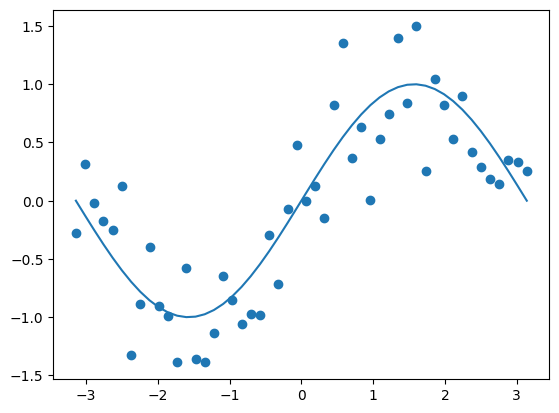

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-np.pi, np.pi)  # 입력
T = np.sin(X)   # 데이터
plt.plot(X, T)  # 노이즈 추가 전

T += 0.4*np.random.randn(len(X))    # 정규분포를 따른 노이즈를 추가
plt.scatter(X, T)
plt.show()

X /= np.pi  # 수렴하기 쉽게 X의 범위를 -1부터 1사이로 수렴

--- 1차 다항식 ---


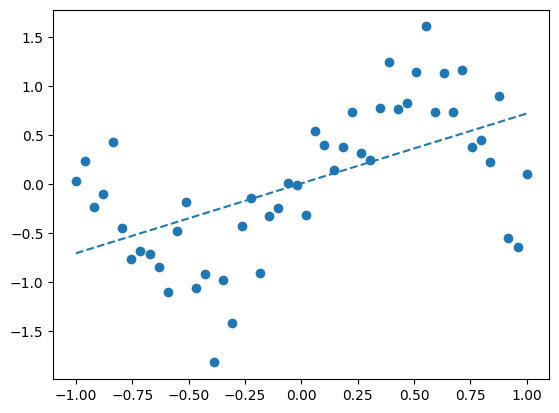

--- 3차 다항식 ---


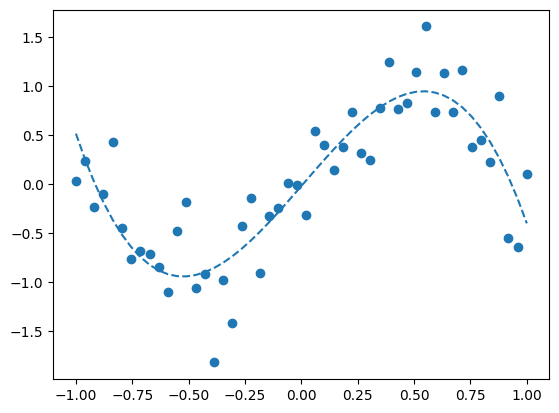

--- 6차 다항식 ---


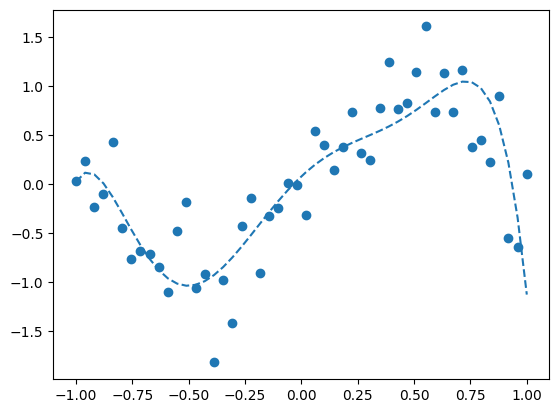

In [8]:
eta = 0.01  # 학습계수

# --- 다항식 ---
def polynomial(x, params):
    poly = 0
    for i in range(len(params)):
        poly += params[i]*x**i
    return poly

# --- 각 파라미터의 기울기 ---
def grad_params(X, T, params):
    grad_ps = np.zeros(len(params))
    for i in range(len(params)):
        for j in range(len(X)):
            grad_ps[i] += (polynomial(X[j], params) - T[j])*X[j]**i
    return grad_ps

# --- 학습 ---
def fit(X, T, degree, epoch):
    # --- 파라미터 초깃값 설정 ---
    params = np.random.randn(degree+1)  # 파라미터의 초깃값
    for i in range(len(params)):
        params[i] *= 2**i   # 고차의 항일수록 파라미터의 초깃값을 크게함

    # --- 파라미터의 갱신 ---
    for i in range(epoch):
        params -= eta * grad_params(X, T, params)

    return params

# --- 결과 표시 ---
degrees = [1, 3, 6]
for degree in degrees:
    print('--- ' + str(degree) + '차 다항식 ---')
    params = fit(X, T, degree, 1000)
    Y = polynomial(X, params)
    plt.scatter(X, T)
    plt.plot(X, Y, linestyle = 'dashed')
    plt.show()

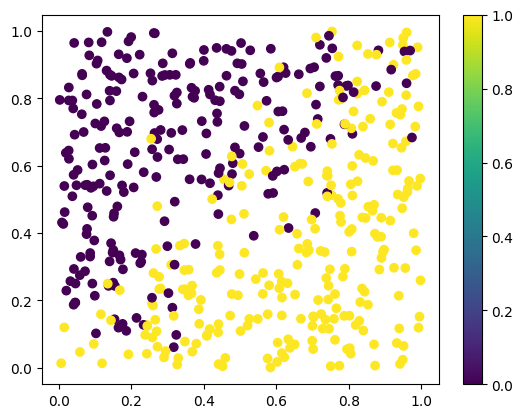

In [10]:
n_data = 500    # 데이터 수
X = np.zeros((n_data, 2))   # 입력
T = np.zeros((n_data))  # 정답

for i in range(n_data):
    x_rand = np.random.rand()
    y_rand = np.random.rand()
    X[i, 0] = x_rand
    X[i, 1] = y_rand

    # x가 y보다 큰 영역에서는 정답 라벨을 1로 설정
    # 경계는 정규분포난수를 이용하여 조금 불명료하게 한다
    if x_rand > y_rand + 0.2*np.random.randn():
        T[i] = 1

plt.scatter(X[:, 0], X[:, 1], c=T)  # 정답 라벨을 색으로 나타냄
plt.colorbar()
plt.show()

--- 확률 분포 ---


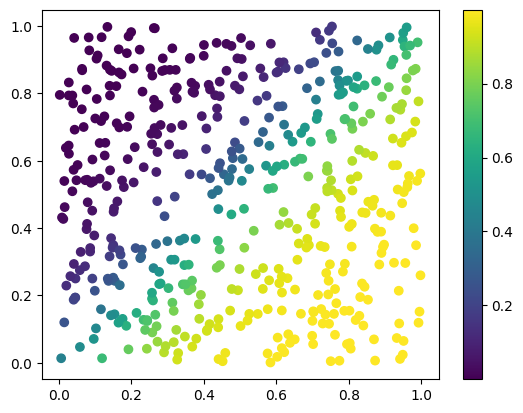

--- 오차의 추이 ---


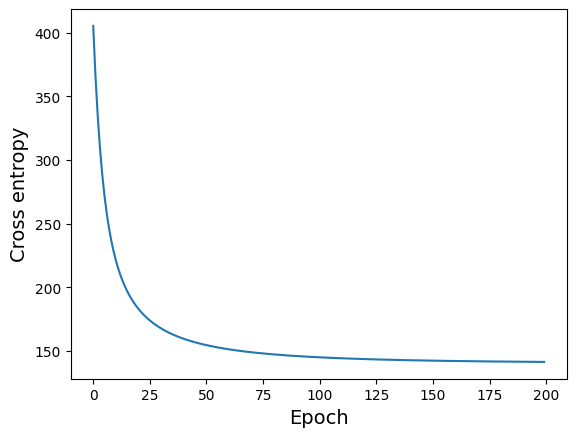

In [11]:
eta = 0.01

# --- 출력을 계산(분류를 시행한다) ---
def classify(x, a_params, b_param):
    u = np.dot(x, a_params) + b_param
    return 1/(1+np.exp(-u))

# --- 크로스 엔트로피 오차 ---
def cross_entropy(Y, T):
    delta = 1e-7
    return -np.sum(T*np.log(Y+delta) + (1-T)*np.log(1-Y+delta))


# --- 각 파라미터의 기울기 ---
def grad_a_params(X, T, a_params, b_param):
    grad_a = np.zeros(len(a_params))
    for i in range(len(a_params)):
        for j in range(len(X)):
            grad_a[i] += (classify(X[j], a_params, b_param) - T[j])*X[j, i]
    return grad_a

def grad_b_param(X, T, a_params, b_param):
    grad_b = 0
    for i in range(len(X)):
        grad_b += (classify(X[i], a_params, b_param) - T[i])
    return grad_b

# --- 학습 ---
error_x = []
error_y = [] # 오차 기록용
def fit(X, T, dim, epoch):
    # 파라미터 초기값 설정
    a_params = np.random.randn(dim)
    b_param = np.random.randn()

    # 파라미터 갱신
    for i in range(epoch):
        grad_a = grad_a_params(X, T, a_params, b_param)
        grad_b = grad_b_param(X, T, a_params, b_param)
        a_params -= eta * grad_a
        b_param -= eta * grad_b

        Y = classify(X, a_params, b_param)
        error_x.append(i)
        error_y.append(cross_entropy(Y, T)) # 오차 기록

    return (a_params, b_param)

# --- 확률 분포의 표시 ---
a_params, b_param = fit(X, T, 2, 200)
Y = classify(X, a_params, b_param)

result_x = []
result_y = []
result_z = []   # 확률

for i in range(len(Y)):
    result_x.append(X[i, 0])
    result_y.append(X[i, 1])
    result_z.append(Y[i])

print('--- 확률 분포 ---')
plt.scatter(result_x, result_y, c=result_z)
plt.colorbar()
plt.show()

print('--- 오차의 추이 ---')
plt.plot(error_x, error_y)
plt.xlabel('Epoch', size=14)
plt.ylabel('Cross entropy', size=14)
plt.show()

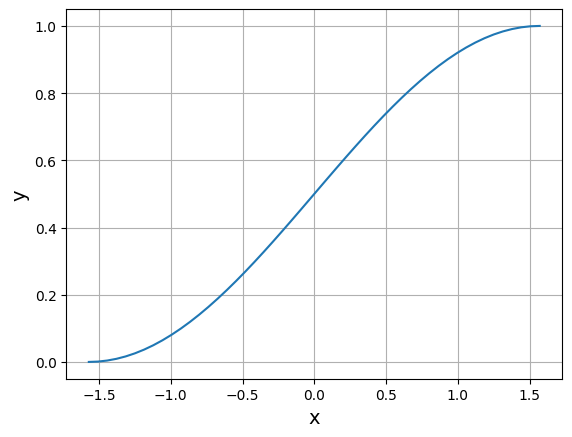

In [3]:
X = np.linspace(-np.pi/2, np.pi/2)  # 입력: -pi/2부터 pi/2의 범위
T = (np.sin(X) + 1)/2   # 정답: 0부터 1의 범위
n_data = len(T) # 데이터 수

plt.plot(X, T)

plt.xlabel('x', size=14)
plt.ylabel('y', size=14)
plt.grid()
plt.show()

In [ ]:
def forward(x, w, b):   # 순전파
    u = x*w + b
    y = 1/(1+np.exp(-u))
    return y

def backward(x, y, t):  # 역전파
    delta = (y - t)*(1-y)*Y
    grad_w = x * delta
    grad_b = delta
    return (grad_w, grad_b)

def show_output(X, Y, T, epoch):
    plt.plot(X, T, linestyle='dashed')
    plt.scatter(X, Y, marker='+')

    plt.xlabel('x', size=14)
    plt.ylabel('y', size=14)
    plt.grid()
    plt.show()

    print('Epoch:', epoch)
    print('Error:', 1/2*np.sum((Y-T)**2))   # 오차제곱합

eta = 0.1
epoch = 100

# --- 초깃값 ---
w = 0.2
b = -0.2

# --- 학습 ---
for i in range(epoch):
    if i < 10:
        Y = forward(X, w, b)
        show_output(X, Y, T, i)

    idx_rand = np.arange(n_data)    # 0부터 n_data-1까지의 정수
    np.random.shuffle(idx_rand)     # 섞음

    for j in idx_rand:  # 랜덤인 샘플
        x = X[j]
        t = T[j]

        y = forward(x, w, b)
        grad_w, grad_b = backward(x, y, t)
        w -= eta * grad_w
        b -= eta * grad_b

# --- 결과 표시 ---
Y = forward(X, w, b)
show_output(X, Y, T ,epoch)